# Biological question: Do the top50 of each way of binding of the orientation analysis have a peferred binding distance?

This notebook can be used to look into a possible correlation between the binding orientation and the binding distance in a chosen cluster.
There are four ways of binding for a transcription factor (TF) co-occurrence:
    - on the same strand is would be TF1- TF2 or TF2-TF1 and
    - on different strands there are the possibilites convergent or divergent.
    
In "Outline of this notebook" the general steps in the notebook are explained. The details for each general step are described directly in the notebook for the general step.  
**Needed input for notebook:** genome and motif files (existing in workspace_stud) + region file , which is the chosen cluster, so the open chromatin region, from WP1 or WP2 + optional .pkl file with performed market basket analysis of chosen cluster.

(you can also have a look at TF-COMB docs)

#### Exemplary Data: WP2 - A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells


### Outline of this notebook:
    1. Implementation of orientation analysis for cluster 
    2. Implementation of distance analysis for cluster
    3. Combination of orientation analysis and distance analysis
    4. Possibility to have a closer look and to compare results of different clusters  

## 1. Implementation of orientation analysis for cluster 
0. Creation of folders for the structure if necessary, so the needed path for the output are existing
1. Read in the **path of the regions of chosen cluster (-> adjust for cluster)**, the general motifs path and the genome path.
2. Peforming the market basket analysis with the count_within() and with the stranded option and directional turned on, so the four different ways of binding are taken into account
3. Analyze preferential orientation of motifs and create a directionality analysis
4. Preparations for the distance analysis

In [1]:
# The following lines, initally check if all file/paths are available. 
#If a result folder does not exist it is created automatically
import os
import pathlib
if not os.path.exists("./results/orientation_distance_combiplots/"):
     pathlib.Path("./results/orientation_distance_combiplots/").mkdir(parents=True, exist_ok=True)
        
if not os.path.exists("./results/orientationdistancetop50/"):
     pathlib.Path("./results/orientationdistancetop50/").mkdir(parents=True, exist_ok=True)
        

In [2]:
import tfcomb.objects
C = tfcomb.objects.CombObj(verbosity=0)

C.TFBS_from_motifs(regions="/mnt/workspace_stud/stud3/WP2_OUTPUT/FINISHED/A8CPH_esophagus_muscularis_mucosa/WP6/A8CPH_esophagus_muscularis_mucosa.10_peaks.bed", 
                   motifs="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme",
                   genome="/mnt/workspace_stud/allstud/homo_sapiens.104.mainChr.fa", 
                   threads=8)

C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()

In [3]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


#### Select the significant pairs on pvalue smaller 0.05 and number of sites greater 50 and visualize the preferences for orientation

In [4]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05) & (df_orientation["TF1_TF2_count"] > 50)]             

/home/stud7/.conda/envs/tfcomb_env/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


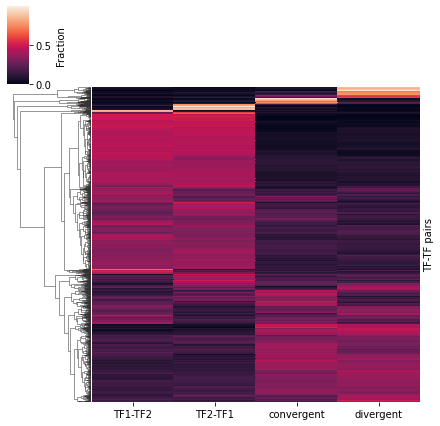

In [5]:
orientation_heatmap = orientation_selected.plot_heatmap()

#### Sorting and displaying the top of the selected TF co-occurrences for each way of binding

In [6]:
#TFs specific in TF1-TF2 orientation
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SREBF1-ZNF384,SREBF1,ZNF384,90,0.900000,0.077778,0.011111,0.011111,0.434471,6.160895e-44
Gfi1b-ZNF460,Gfi1b,ZNF460,181,0.889503,0.027624,0.049724,0.033149,0.426439,2.709945e-85
Nr2f6var.2-SNAI2,Nr2f6var.2,SNAI2,66,0.878788,0.106061,0.015152,0.000000,0.421800,2.406795e-30
Rarg-SNAI2,Rarg,SNAI2,56,0.875000,0.107143,0.017857,0.000000,0.419294,1.938112e-25
MEF2A-SNAI2,MEF2A,SNAI2,100,0.870000,0.110000,0.010000,0.010000,0.416013,9.237930e-45
MEF2C-SNAI2,MEF2C,SNAI2,74,0.851351,0.135135,0.000000,0.013514,0.405480,1.921162e-31
Gfi1b-ZNF135,Gfi1b,ZNF135,100,0.850000,0.060000,0.080000,0.010000,0.401082,1.345528e-41
MEF2D-SNAI2,MEF2D,SNAI2,73,0.849315,0.136986,0.000000,0.013699,0.404264,7.854328e-31
CEBPGvar.2-ZNF460,CEBPGvar.2,ZNF460,139,0.820144,0.043165,0.086331,0.050360,0.380565,4.343015e-52
SREBF2-ZNF460,SREBF2,ZNF460,82,0.817073,0.024390,0.097561,0.060976,0.379227,1.783986e-30


In [7]:
# TFs specific in TF2-TF1 orientation
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
MEF2D-Nr2f6var.2,MEF2D,Nr2f6var.2,274,0.014599,0.985401,0.000000,0.000000,0.490316,5.054392e-171
MEF2D-Rarg,MEF2D,Rarg,224,0.008929,0.982143,0.004464,0.004464,0.488100,1.763185e-138
MEF2C-Nr2f6var.2,MEF2C,Nr2f6var.2,260,0.019231,0.973077,0.007692,0.000000,0.482116,7.204228e-157
MEF2D-RARA,MEF2D,RARA,93,0.010753,0.967742,0.010753,0.010753,0.478495,4.194852e-55
MEF2A-Nr2f6var.2,MEF2A,Nr2f6var.2,310,0.025806,0.964516,0.009677,0.000000,0.476463,9.642921e-183
MEF2D-Rarb,MEF2D,Rarb,110,0.027273,0.954545,0.009091,0.009091,0.469775,7.561970e-63
MEF2C-RARA,MEF2C,RARA,87,0.022989,0.954023,0.011494,0.011494,0.469380,1.375085e-49
MEF2C-Rarg,MEF2C,Rarg,214,0.023364,0.953271,0.009346,0.014019,0.468884,4.805098e-122
MEF2A-Rarg,MEF2A,Rarg,261,0.030651,0.950192,0.011494,0.007663,0.466903,1.143050e-147
MEF2D-SREBF1var.2,MEF2D,SREBF1var.2,146,0.034247,0.945205,0.006849,0.013699,0.463617,2.622516e-81


In [8]:
#TFs specific in convergent orientation¶
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF2-MEF2D,KLF2,MEF2D,106,0.009434,0.009434,0.962264,0.018868,0.474864,7.044897e-62
KLF6-MEF2D,KLF6,MEF2D,105,0.000000,0.009524,0.961905,0.028571,0.474752,2.899779e-61
KLF3-MEF2D,KLF3,MEF2D,67,0.000000,0.029851,0.940299,0.029851,0.460414,1.026178e-36
Klf12-MEF2D,Klf12,MEF2D,65,0.000000,0.030769,0.938462,0.030769,0.459203,1.981068e-35
Klf12-MEF2A,Klf12,MEF2A,74,0.000000,0.040541,0.932432,0.027027,0.455267,1.174690e-39
PITX2-ZNF460,PITX2,ZNF460,161,0.012422,0.018634,0.931677,0.037267,0.454574,3.260830e-86
RHOXF1-ZNF460,RHOXF1,ZNF460,161,0.012422,0.018634,0.931677,0.037267,0.454574,3.260830e-86
Klf12-MEF2C,Klf12,MEF2C,65,0.015385,0.030769,0.923077,0.030769,0.448777,7.773113e-34
KLF3-MEF2C,KLF3,MEF2C,68,0.000000,0.044118,0.911765,0.044118,0.441666,2.759632e-34
MEF2D-SP3,MEF2D,SP3,70,0.042857,0.014286,0.900000,0.042857,0.433543,5.240699e-34


In [9]:
# TFs specific in divergent orientation
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
MEF2D-Nr1h3Rxra,MEF2D,Nr1h3Rxra,51,0.000000,0.039216,0.000000,0.960784,0.474217,1.227420e-29
SREBF1-ZNF135,SREBF1,ZNF135,99,0.000000,0.040404,0.020202,0.939394,0.459892,3.489283e-54
SREBF1var.2-ZNF135,SREBF1var.2,ZNF135,256,0.003906,0.019531,0.046875,0.929688,0.453473,1.339381e-136
MEF2A-Nr1h3Rxra,MEF2A,Nr1h3Rxra,69,0.000000,0.057971,0.028986,0.913043,0.442662,6.002428e-35
MEF2D-Zfx,MEF2D,Zfx,217,0.013825,0.036866,0.036866,0.912442,0.441762,8.053339e-110
MEF2D-ZNF354C,MEF2D,ZNF354C,212,0.033019,0.028302,0.028302,0.910377,0.440257,1.496952e-106
Rarb-Zfx,Rarb,Zfx,64,0.015625,0.015625,0.062500,0.906250,0.438058,9.704983e-32
Nr2f6var.2-Zfx,Nr2f6var.2,Zfx,200,0.005000,0.055000,0.040000,0.900000,0.433839,1.382233e-97
Rarg-Zfx,Rarg,Zfx,155,0.006452,0.058065,0.051613,0.883871,0.423204,6.706469e-72
MGA-Rarg,MGA,Rarg,60,0.000000,0.066667,0.050000,0.883333,0.423171,9.181954e-28


#### Creation of list with all selected TF co-occurrences of orientation analysis for selecting the TF-pairs which are searched for in the distance analysis

In [10]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
len(TF_pairs)

2616

## 2. Implementation of distance analysis for cluster
1. Read in path of the the **.pkl file from already performed market basket analysis of chosen cluster (alternative: perform normal market basket analysis) (-> adjust for cluster)**
2. With list TF_pairs creating object with only the seleceted TF co-occurrences of the orientation analysis
3. Performing distance analysis with considering the noisiness (lower noise -> "clearer/better" analysis)


In [11]:
from tfcomb import CombObj
pancreas_cluster2_object = CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/A8CPH_esophagus_muscularis_mucosa/A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells.pkl")

In [12]:
TF_pairs_of_orientation_for_distance=pancreas_cluster2_object.select_custom_rules(TF_pairs)

In [13]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [14]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


In [15]:
TF_pairs_of_orientation_for_distance.distObj.peaks

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
4293,Rarg,TBX4,41,6.576577,6.838940,2,60,0.816667,0.007847,26.0,11.0,18.0,18.333333
4292,Rarg,TBX15,41,6.576577,6.838940,2,60,0.816667,0.007847,26.0,11.0,18.0,18.333333
3800,MGA,Rarg,41,6.576577,6.838940,2,60,0.816667,0.007847,26.0,11.0,18.0,18.333333
4291,Rarg,TBX1,41,6.576577,6.838940,2,60,0.816667,0.007847,26.0,11.0,18.0,18.333333
4294,Rarg,TBX5,41,6.576577,6.838940,2,60,0.816667,0.007847,26.0,11.0,18.0,18.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,NFYB,SP8,94,2.053612,3.102100,2,146,0.047945,0.411005,1885.0,4883.0,2511.0,3093.000000
1061,EGR3,ZNF460,100,2.048006,2.048006,2,287,0.027875,0.351011,2031.0,4907.0,2436.0,3124.666667
961,EGR2,KLF15,87,2.031895,3.113553,2,400,0.042500,0.346989,1959.0,5001.0,2429.0,3129.666667
3011,KLF2,SP9,81,2.012690,2.710247,2,1229,0.044752,0.351116,1927.0,5119.0,2437.0,3161.000000


 ## 3. Combination of orientation analysis and distance analysis
 1. Merging the results from the orientation and the distance analysis in one dataframe df_orientation_distance
 2. Reducing the TF co-occurrences by selecting the TF co-occurrences by peak hight of distance analysis above 2.8 (good proven boundary from other applications of distance analysis) and then progress the top50 of each orientation of binding
 3. Saving the dataframes of the **top50 of each orietnation in .csv file (-> adjust for cluster)**
 4. Plotting the peak hights of the distance analysis over the distance with the percentage of orientation in the color of the points
 5. Saving the **combiplot of the four orientations in png.file (-> adjust for cluster)**


In [16]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])


In [17]:
df_top50_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF1-TF2'], ascending=False).head(50)
df_top50_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF2-TF1'], ascending=False).head(50)
df_top50_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['convergent'], ascending=False).head(50)
df_top50_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['divergent'], ascending=False).head(50)


In [18]:
df_top50_T1_TF2.to_csv("./results/orientationdistancetop50/A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells_T1_TF2.csv")
df_top50_T2_TF1.to_csv("./results/orientationdistancetop50/A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells_T2_TF1.csv")
df_top50_convergent.to_csv("./results/orientationdistancetop50/A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells_convergent.csv")
df_top50_divergent.to_csv("./results/orientationdistancetop50/A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells_divergent.csv")

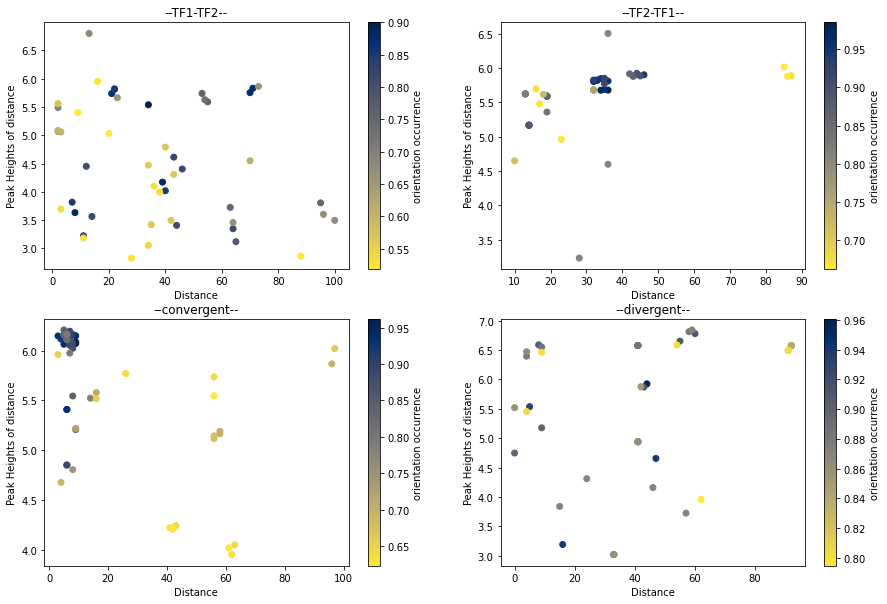

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# subplot TF1-TF2
plt.subplot(221) 
plt.scatter(df_top50_T1_TF2['Distance'], df_top50_T1_TF2['Peak Heights'], c= df_top50_T1_TF2['TF1-TF2'], cmap = 'cividis_r')
plt.title("--TF1-TF2--")
cbar = plt.colorbar()
cbar.set_label("orientation occurrence")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")

# subplot TF2-TF1
plt.subplot(222) 
plt.scatter(df_top50_T2_TF1['Distance'], df_top50_T2_TF1['Peak Heights'], c= df_top50_T2_TF1['TF2-TF1'], cmap = 'cividis_r')
plt.title("--TF2-TF1--")
cbar = plt.colorbar()
cbar.set_label("orientation occurrence")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")


# subplot convergent
plt.subplot(223) 
plt.scatter(df_top50_convergent['Distance'], df_top50_convergent['Peak Heights'], c= df_top50_convergent['convergent'], cmap = 'cividis_r')
plt.title("--convergent--")
cbar = plt.colorbar()
cbar.set_label("orientation occurrence")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")


# subplot divergent
plt.subplot(224) 
plt.scatter(df_top50_divergent['Distance'], df_top50_divergent['Peak Heights'], c= df_top50_divergent['divergent'], cmap = 'cividis_r')
plt.title("--divergent--")
cbar = plt.colorbar()
cbar.set_label("orientation occurrence")


plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")
plt.savefig("./results/orientation_distance_combiplots/A8CPH_esophagus_muscularis_mucosa_c10_Stromal_cells.png") 
plt.show()


A preferred binding distance can be assumed if especially many grey/blue points occur more frequently at a certain range of a distance than in the other distances. These findings can be compared over the four different binding orientations and can be compared among each other. In addition to that the plots can be compared to other clusters and examined for similarities.

## 4. Possibility to have a closer look and to compare results of different clusters

####  Possibility to import other combiplots from different clusters for comparisons (->  adjust for cluster)

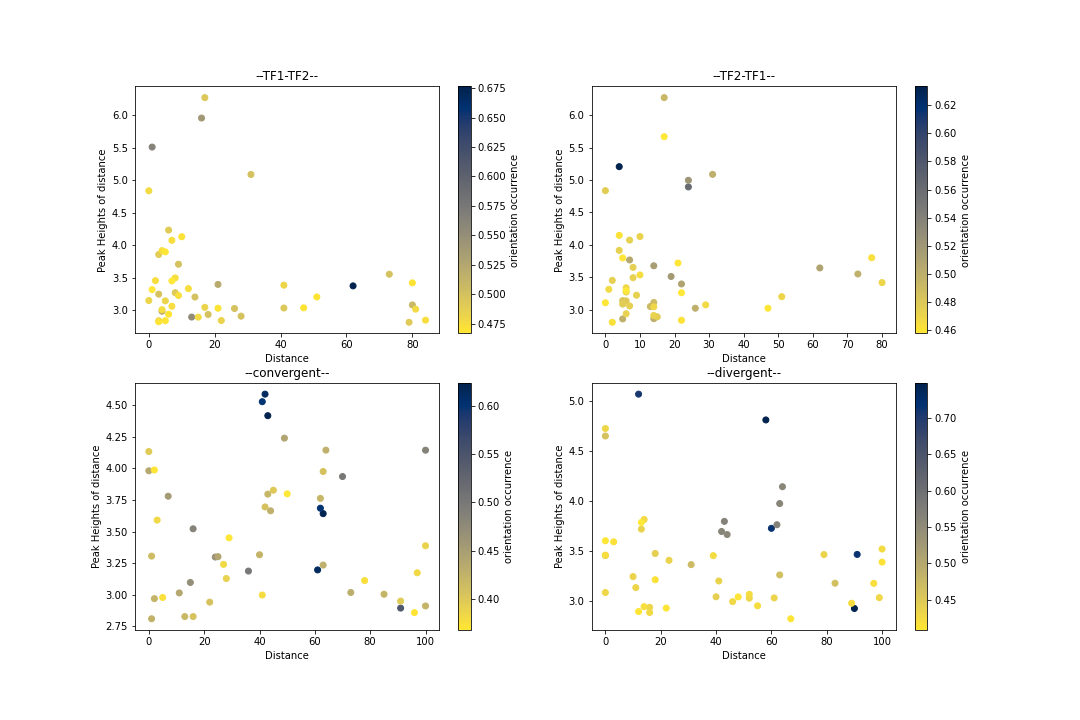

In [20]:
from PIL import Image

image = Image.open("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/results/orientation_distance_combiplots/ACCQ1_colon_transverse_c3_Enterocytes.png")
image.show()

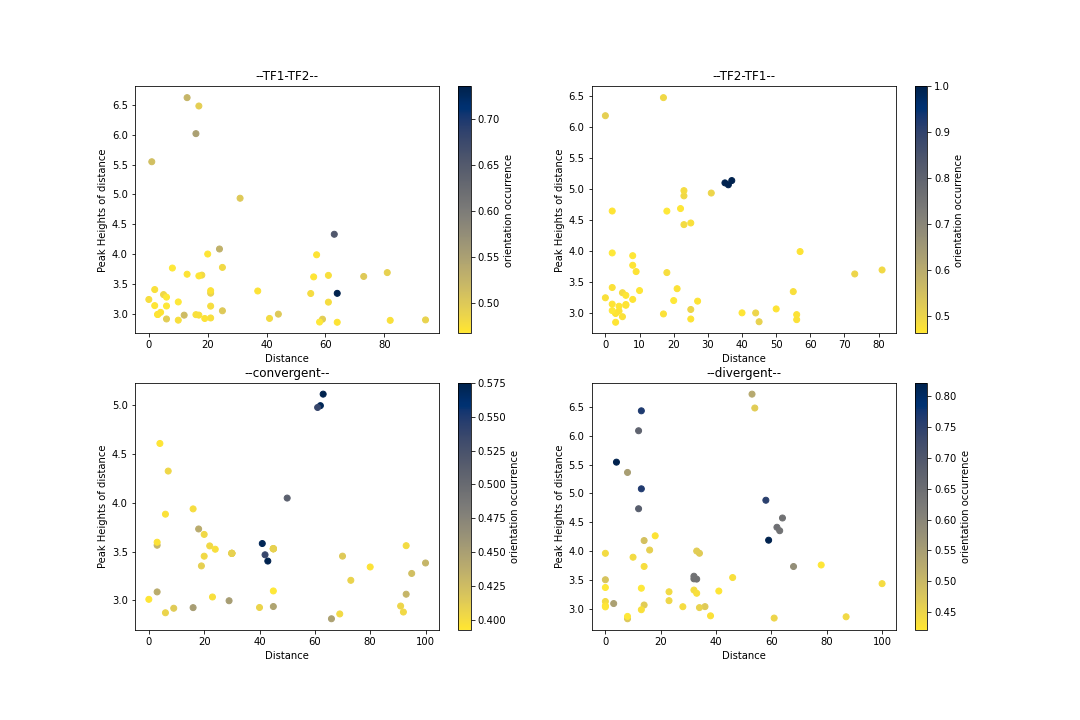

In [21]:
from PIL import Image

image = Image.open("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/results/orientation_distance_combiplots/ACCQ1_colon_transverse_c1_Gastric_chief_cells.png")
image.show()

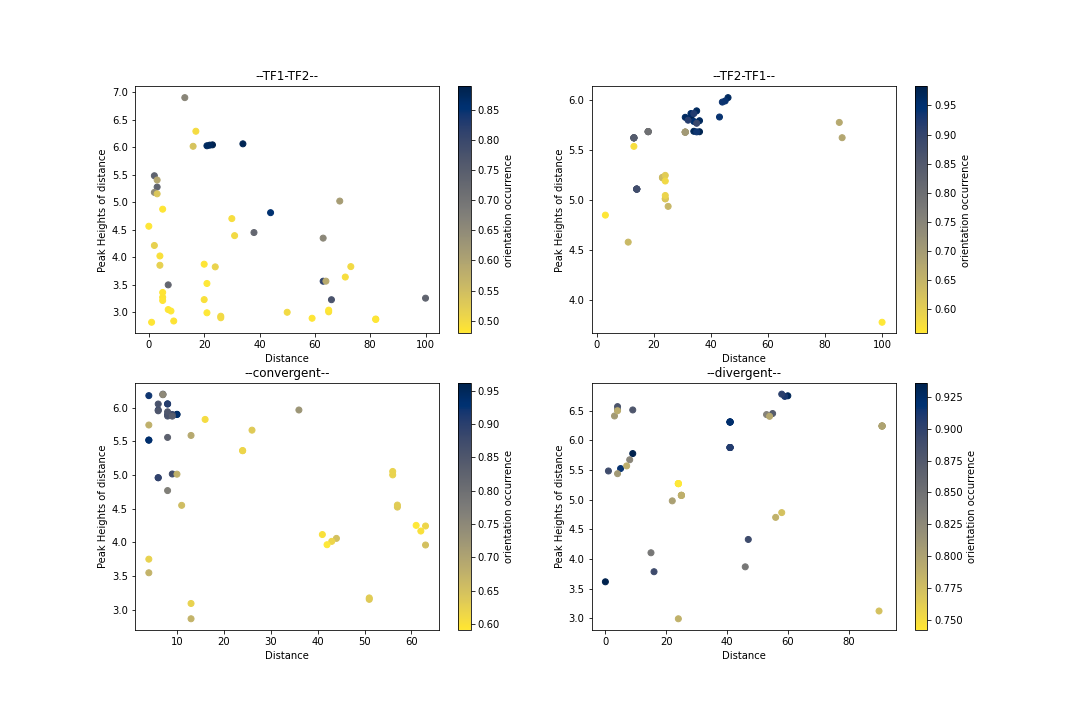

In [22]:
from PIL import Image

image = Image.open("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/results/orientation_distance_combiplots/ACCQ1_colon_transverse_c4_Paneth_cells.png")
image.show()

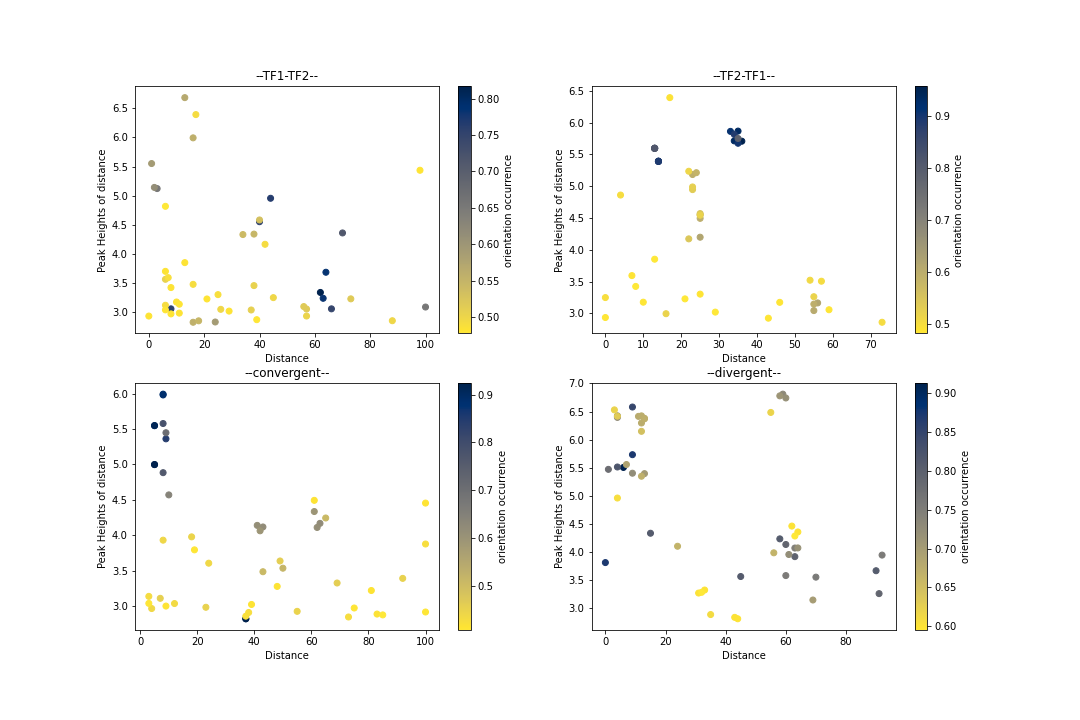

In [23]:
from PIL import Image

image = Image.open("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/results/orientation_distance_combiplots/A8CPH_esophagus_muscularis_mucosa_c7_Fibroblasts.png")
image.show()

####  Possibility to look at the distance plot of a specific TF co-occurrence other combiplots

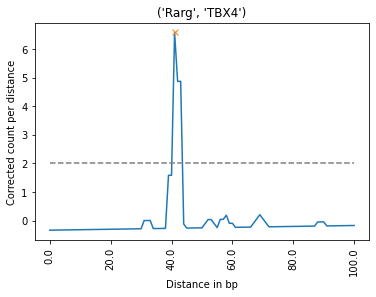

In [24]:
TF_pairs_of_orientation_for_distance.distObj.plot(("Rarg", "TBX4"), method="signal")

####  Possibility to look at the top50 of an orientation of a cluster (-> adjust for cluster)

In [25]:
import pandas as pd
#df_top50_T2_TF1_csv=pd.read_csv("./results/orientationdistancetop50/ACCQ1_colon_transverse_c1_Gastric_chief_cells_T1_TF2.csv")
#df_top50_T2_TF1_csv